In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#import california housing data
from sklearn.datasets import fetch_california_housing

In [6]:
cal_data = fetch_california_housing()

In [7]:
cal_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [19]:
cal_data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

# 1. Load the California Housing dataset into a Pandas DataFrame.


In [10]:
#make data frame of housing data
calf = pd.DataFrame(cal_data.data,columns=cal_data.feature_names)

In [11]:
calf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
calf.shape

(20640, 8)

In [13]:
calf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


# 2. Preprocess the dataset. Remove any rows with missing values. Drop the Latitude and Longitude columns.


In [14]:
#check null values
calf.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [18]:
#check duplicates
calf.duplicated().sum()

0

In [29]:
df = calf.drop(['Latitude','Longitude'],axis=1)

In [30]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [33]:
# MHVB is target (house value of block unit)
df['MHVB'] = cal_data.target

In [34]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MHVB
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


# 3. Visualize the dataset. Plot histograms of all the features

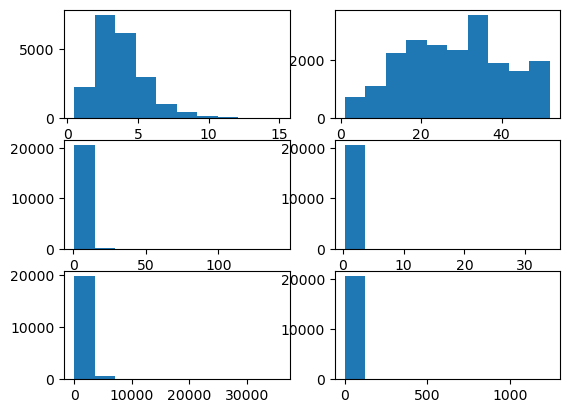

In [41]:
plt.subplot(3,2,1)
plt.hist(df['MedInc'])

plt.subplot(3,2,2)
plt.hist(df['HouseAge'])

plt.subplot(3,2,3)
plt.hist(df['AveRooms'])

plt.subplot(3,2,4)
plt.hist(df['AveBedrms'])

plt.subplot(3,2,5)
plt.hist(df['Population'])

plt.subplot(3,2,6)
plt.hist(df['AveOccup'])

plt.show()

C:\Users\HP\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


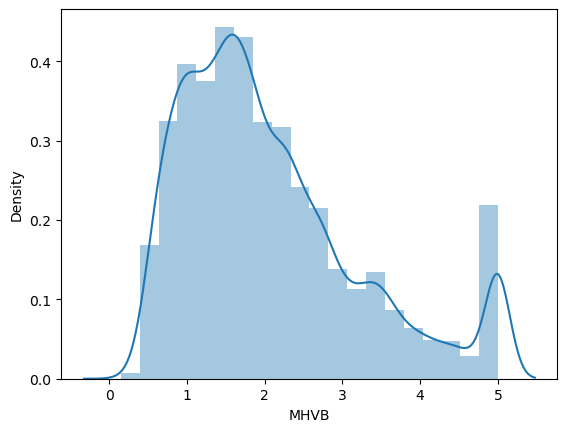

In [43]:
#distribution plot of target
sns.distplot(df['MHVB'],bins=20)
plt.show()

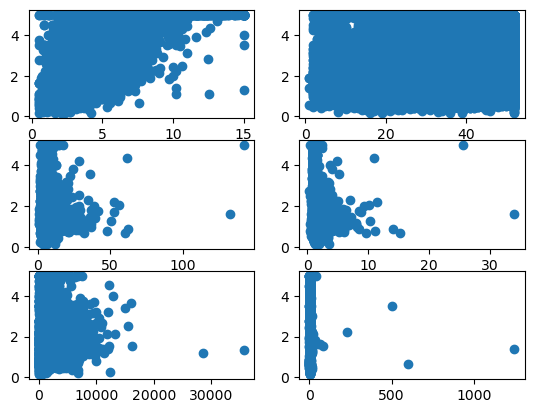

In [47]:
plt.subplot(3,2,1)
plt.scatter(df['MedInc'],df['MHVB'])

plt.subplot(3,2,2)
plt.scatter(df['HouseAge'],df['MHVB'])

plt.subplot(3,2,3)
plt.scatter(df['AveRooms'],df['MHVB'])

plt.subplot(3,2,4)
plt.scatter(df['AveBedrms'],df['MHVB'])

plt.subplot(3,2,5)
plt.scatter(df['Population'],df['MHVB'])

plt.subplot(3,2,6)
plt.scatter(df['AveOccup'],df['MHVB'])

plt.show()

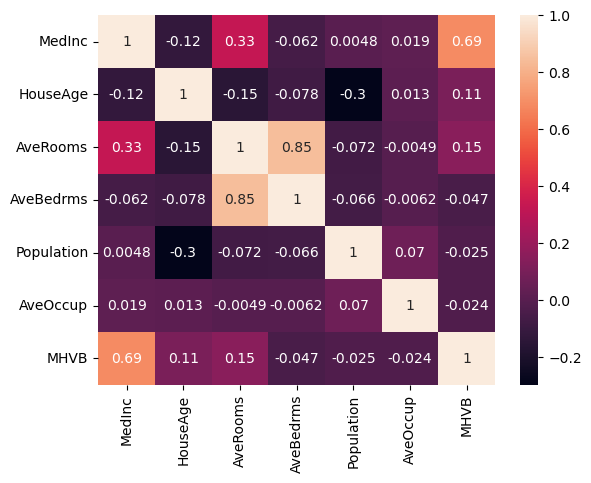

In [49]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
x = df.iloc[0:,0:-2]

In [53]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population
0,8.3252,41.0,6.984127,1.023810,322.0
1,8.3014,21.0,6.238137,0.971880,2401.0
2,7.2574,52.0,8.288136,1.073446,496.0
3,5.6431,52.0,5.817352,1.073059,558.0
4,3.8462,52.0,6.281853,1.081081,565.0
...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0
20636,2.5568,18.0,6.114035,1.315789,356.0
20637,1.7000,17.0,5.205543,1.120092,1007.0
20638,1.8672,18.0,5.329513,1.171920,741.0


In [54]:
y = df['MHVB']

In [55]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MHVB, Length: 20640, dtype: float64

# 4. Split the dataset into training and test sets with a 80/20 split.


In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

# 5. Train a multiple polynomial regression model on the training set. Use only the MedInc, HouseAge, AveRooms, AveBedrms, and Population columns. Use polynomial features up to degree 2.


In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
def polymodel(degree):
    poly_feat = PolynomialFeatures(degree=degree)
    x_train_poly = poly_feat.fit_transform(x_train)
    x_test_poly = poly_feat.fit_transform(x_test)
    
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly,y_train)
    
    y_train_pred_poly = poly_model.predict(x_train_poly)
    y_test_pred_poly =  poly_model.predict(x_test_poly)
    
    rsme_train =(np.sqrt(mean_squared_error(y_train,y_train_pred_poly)))
    rsme_test =(np.sqrt(mean_squared_error(y_test,y_test_pred_poly)))
    
    r2_train = r2_score(y_train,y_train_pred_poly)
    r2_test = r2_score(y_test,y_test_pred_poly)
    
    print('rsme_train',rsme_train)
    print('rsme_test',rsme_test)
    
    print('r2_train',r2_train)
    print('r2_test',r2_test)

In [61]:
polymodel(2)

rsme_train 0.7485010138949003
rsme_test 0.7438981899072223
r2_train 0.5760068885696576
r2_test 0.5964160612552328
